In [142]:
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from jupyter_notebook import load_parameters 

In [143]:
# pars = load_parameters()

# input_file = pars.get('input')
# output_file = pars.get('output')

# dataset = pars.get('dataset')

# debug = pars.get('debug')

In [144]:
import pandas as pd
import os

data_folder = os.path.join('..', '..', 'data', 'stack-overflow')

dataset_file = os.path.join(data_folder, 'Dataset - Pandas.csv')
real_code_file = os.path.join(data_folder, 'pandas-preprocessedcode-dataset-part3')

output_folder = os.path.join('..', '..', 'data', 'dataset')



In [145]:
dataset = pd.read_csv(dataset_file, sep=',')
code = pd.read_pickle(real_code_file)

# dataset = dataset.set_index('AnswerId')
code = code.set_index('Id')

# Filter only answers
dataset = dataset[dataset.AnswerId > 0]

In [146]:
def solutions_amount(df):
    return pd.Series({'# of Solutions': len(df['Solution'])})

solution_amount_df = dataset.groupby('AnswerId', as_index=True).apply(solutions_amount)

LINE_SEP = '\n'

def solution_size(df):
    solution_series = df['Solution']
    count = 0
    for _,s in solution_series.iteritems():
        count += len(str(s).split(LINE_SEP))
    
    return pd.Series({'Solution Size': count})


solution_size_df = dataset.groupby('AnswerId', as_index=True).apply(solution_size) 


In [147]:
code_dataset = pd.merge(code, solution_amount_df, left_index=True, right_index=True, how='inner')
code_dataset = pd.merge(code_dataset, solution_size_df, left_index=True, right_index=True, how='inner')


In [148]:
code_dataset['Snippet Size'] = dataset_code['PreprocessedCode3'].apply(lambda x: len(x.split(os.linesep)))
code_dataset

,Unnamed: 0,Unnamed: 0.1,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,...,Tags,Title,ViewCount,Code,PreprocessedCode,PreprocessedCode2,PreprocessedCode3,# of Solutions,Solution Size,Snippet Size
10374456,195,195,NaN,NaN,<p><code>g1</code> here <em>is</em> a DataFram...,NaN,4,NaN,2012-04-29T17:50:33.950,NaN,...,NaN,NaN,NaN,In [19]: type(g1)\r\nOut[19]: pandas.core.fram...,In [19]: type(g1)\r\nOut[19]: pandas.core.fram...,type(g1)\r\ng1.index\r\ng1.add_suffix('_Count'...,type(g1)\r\ng1.index\r\ng1.add_suffix('_Count'...,2,2,4
11287278,414,414,NaN,NaN,<p>The column names (which are strings) cannot...,NaN,12,NaN,2012-07-02T02:43:02.740,NaN,...,NaN,NaN,NaN,"df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...","df1 = df[['a','b']]\r\ndf1 = df.ix[:,0:2] # Re...",3,3,3
11346337,434,434,NaN,NaN,<p>Just assign it to the <code>.columns</code>...,NaN,9,NaN,2012-07-05T14:23:27.910,NaN,...,NaN,NaN,NaN,">>> df = pd.DataFrame({'$a':[1,2], '$b': [10,2...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...","df = pd.DataFrame({'$a':[1,2], '$b': [10,20]})...",1,1,3
11354850,439,439,NaN,NaN,<p>Use the rename function and refer the colum...,NaN,6,NaN,2012-07-06T01:48:15.147,NaN,...,NaN,NaN,NaN,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,df = df.rename(columns={'oldName1': 'newName1'...,2,2,3
11531402,499,499,NaN,NaN,"<p>Based on github issue <a href=""https://gith...",NaN,5,NaN,2012-07-17T21:52:18.983,NaN,...,NaN,NaN,NaN,"df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]\r\n","df[df['A'].str.contains(""hello"")]",1,1,1
11617194,521,521,NaN,NaN,<p>The newest versions of pandas now include a...,NaN,4,NaN,2012-07-23T17:09:39.743,NaN,...,NaN,NaN,NaN,"for index, row in df.iterrows():\r\n\r\n # ...","for index, row in df.iterrows():\r\n\r\n # ...","for index, row in df.iterrows():\r\n\r\n # ...",,2,2,1
12065904,696,696,NaN,NaN,<p>Use the <code>isin</code> method. <code>rp...,NaN,12,NaN,2012-08-22T03:21:12.067,NaN,...,NaN,NaN,NaN,,,,,1,1,1
12681217,1018,1018,NaN,NaN,<p>How about something like this:</p>\r\n\r\n<...,NaN,8,NaN,2012-10-01T21:15:03.957,NaN,...,NaN,NaN,NaN,"In [55]: pd.concat([Series(row['var2'], row['v...","In [55]: pd.concat([Series(row['var2'], row['v...","pd.concat([Series(row['var2'], row['var1'].spl...","pd.concat([Series(row['var2'], row['var1'].spl...",1,1,2
13270110,1332,1332,NaN,NaN,<p>If you have a key that is repeated for each...,NaN,1,NaN,2012-11-07T12:47:36.283,NaN,...,NaN,NaN,NaN,"from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...","from pandas import DataFrame, merge\r\ndf1 = D...",1,1,4
13337376,1364,1364,NaN,NaN,<p>Here's an example using <code>apply</code> ...,NaN,11,NaN,2012-11-12T01:39:09.783,NaN,...,NaN,NaN,NaN,In [49]: df\r\nOut[49]: \r\n 0 ...,In [49]: df\r\nOut[49]: \r\n 0 ...,df\r\ndef f(x): \r\n ....: return x[0] +...,df,1,1,1


In [149]:
print(code_dataset[['Snippet Size', 'Solution Size', '# of Solutions']].describe())

       Snippet Size  Solution Size  # of Solutions
count     53.000000      53.000000       53.000000
mean       4.924528       2.584906        2.132075
std        4.811241       2.152226        1.871217
min        1.000000       1.000000        1.000000
25%        1.000000       1.000000        1.000000
50%        3.000000       2.000000        1.000000
75%        7.000000       3.000000        3.000000
max       21.000000      10.000000        9.000000


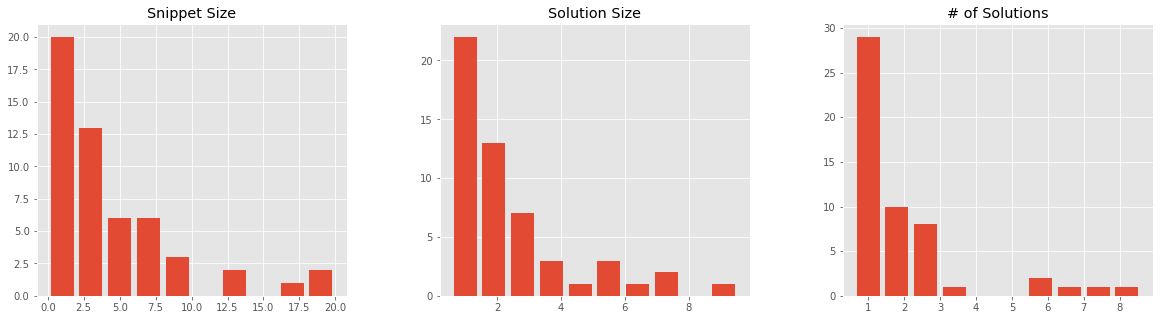

In [152]:
import matplotlib.pyplot as plt

plt.clf() 
plt.style.use('ggplot')


fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=3)
    
code_dataset.hist('Snippet Size', align='left', rwidth=0.8, ax=axes[0])
code_dataset.hist('Solution Size', align='left', rwidth=0.8, ax=axes[1])
code_dataset.hist('# of Solutions', align='left', rwidth=0.8, ax=axes[2])

plt.savefig(os.path.join(output_folder, 'histogram.jpg'))
plt.show()


